# Sequence Dispersion Minimization

"Phase dispersion minimization" (PDM) is a period-finding method where we don't assume the shape of signals, only  that they are periodic, and search over a grid of periods to find one that produces the smallest dispersion at a given phase-folding. The problem is appealing b/c we don't care about *when* the pattern begins, so long as it's strictly repeating.

Instead, what if we didn't have signals that were simply periodic, but repeating using other sequences of separation (e.g. [integer sequences](https://en.wikipedia.org/wiki/Integer_sequence))? Assuming a particular sequence (e.g. [Fibonacci](https://en.wikipedia.org/wiki/Fibonacci_number), or maybe something more interesting like [Kolakoski](https://en.wikipedia.org/wiki/Kolakoski_sequence)), we can search over a "periods" (actually characteristic timescales) and sequence start times. It's not as trivial as PDM, but it's conceptually similar to [BLS](https://docs.astropy.org/en/stable/timeseries/bls.html), and I bet there are tricks we can play to speed it up. Example: for scaling sequences like Fibonacci, we can limit our search volume based on our data's properties.

So let's explore **Sequence Dispersion Minimization**!

_musings_

I'm still wondering, if you picked up the Kolakoski sequence 100 steps into the sequence, would you be able to predict the next timing separation given N observations?

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

# where I'm writing down important functions I'm re-using
from stuff import *

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

Text(0, 0.5, 'Flux')

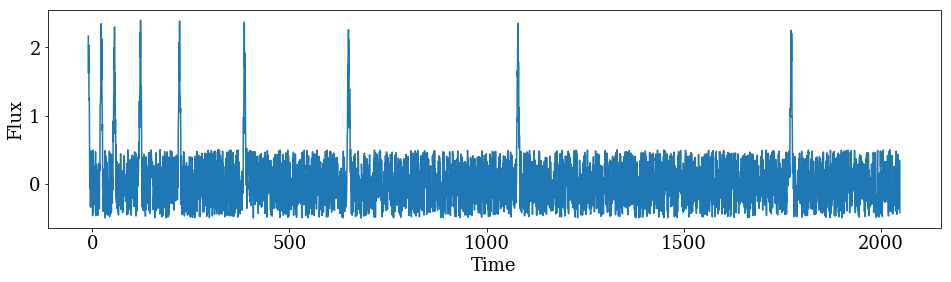

In [17]:
# let's make a Fib-spaced light curve pulse sequence

std = 2
tau = 33
amp = 2.
t0 = 0

time = np.arange(-10, 2048, 0.5)

flux = np.random.random(len(time))*1 - 0.5 
flux = flux + fib_gaus1(time, tau, amp, std, t0=t0)

plt.figure(figsize=(16,4))
plt.plot(time, flux)
plt.xlabel('Time')
plt.ylabel('Flux')
# plt.savefig('big_lc.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

Text(0, 0.5, 'Flux')

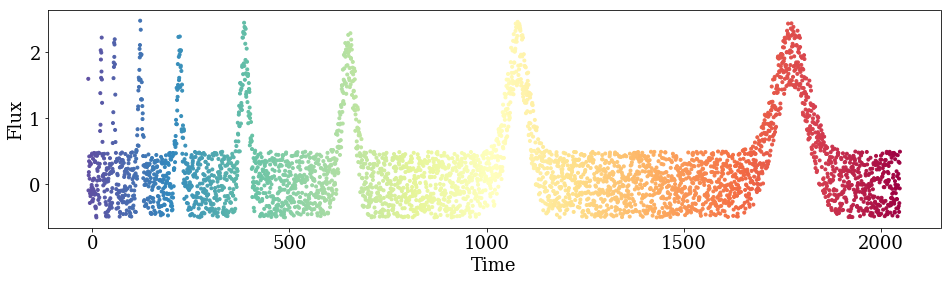

In [62]:
flux2 = np.random.random(len(time))*1 - 0.5 
flux2 = flux2 + fib_gaus2(time, tau, amp, std, t0=t0, Nfib=9)

plt.figure(figsize=(16,4))
plt.scatter(time, flux2, c=time, marker='.', cmap=plt.cm.Spectral_r)
plt.xlabel('Time')
plt.ylabel('Flux')

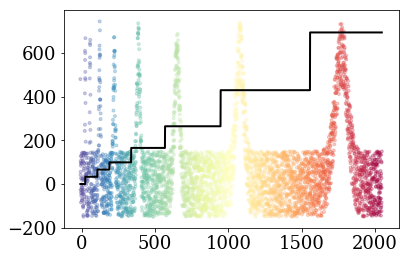

In [99]:
step = np.zeros_like(time)
fib_seq = fib(10) * tau
dseq = (fib_seq[1:] - fib_seq[0:-1]) / 2

for k in range(1,len(fib_seq)):
    step[(time >= np.nanmin(time) + t0 + np.cumsum(fib_seq)[k-1] - dseq[k-1]) & 
         (time < np.nanmin(time) + t0 + np.cumsum(fib_seq)[k] - dseq[k-1])] = fib_seq[k-1]

plt.plot(time, step, c='k', lw=2)
plt.scatter(time, flux2*300, c=time, marker='.', cmap=plt.cm.Spectral_r, alpha=0.3)

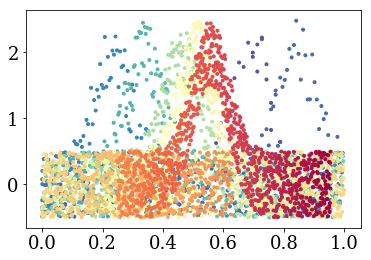

In [103]:
# hm, this phase-folding isnt quite right.... confused

plt.scatter((time % step)/step, flux2, marker='.', c=time, cmap=plt.cm.Spectral_r)